# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [81]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [82]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [83]:
df_can['OdName'].head(50)

0                                        Afghanistan
1                                            Albania
2                                            Algeria
3                                     American Samoa
4                                            Andorra
5                                             Angola
6                                Antigua and Barbuda
7                                          Argentina
8                                            Armenia
9                                          Australia
10                                           Austria
11                                        Azerbaijan
12                                           Bahamas
13                                           Bahrain
14                                        Bangladesh
15                                          Barbados
16                                           Belarus
17                                           Belgium
18                                            

Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [84]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [85]:
df_can.loc['China']

Continent                  Asia
Region             Eastern Asia
DevName      Developing regions
1980                       5123
1981                       6682
1982                       3308
1983                       1863
1984                       1527
1985                       1816
1986                       1960
1987                       2643
1988                       2758
1989                       4323
1990                       8076
1991                      14255
1992                      10846
1993                       9817
1994                      13128
1995                      14398
1996                      19415
1997                      20475
1998                      21049
1999                      30069
2000                      35529
2001                      36434
2002                      31961
2003                      36439
2004                      36619
2005                      42584
2006                      33518
2007                      27642
2008    

**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

In [86]:
# Rahma Fadhila Moenggah (1301180050) 
import matplotlib.pyplot as plt

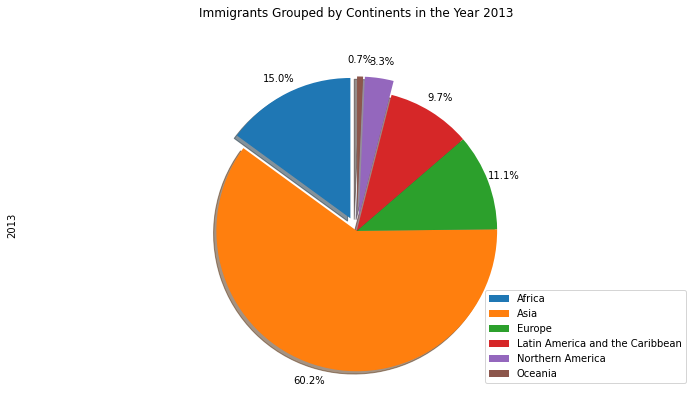

In [87]:
### type your answer here
df_continents = df_can.groupby('Continent', axis=0).sum()
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['2013'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%',   # Add in percentage
                            startangle=90,       
                            labels=None,          
                            pctdistance=1.12,      
                            explode=explode_list, 
                            shadow=True
                          )

plt.title('Immigrants Grouped by Continents in the Year 2013', y=1.12) 
plt.axis('equal') 

# Add legend
plt.legend(labels=df_continents.index, loc='lower right') 

plt.show()

In [88]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


**Question 2:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe **df_CI**.

In [89]:
# Rahma Fadhila Moenggah (1301180050) 
### type your answer here
years = list(map(str, range(1980, 2014)))
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI 

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


In [90]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Step 2: Plot data.

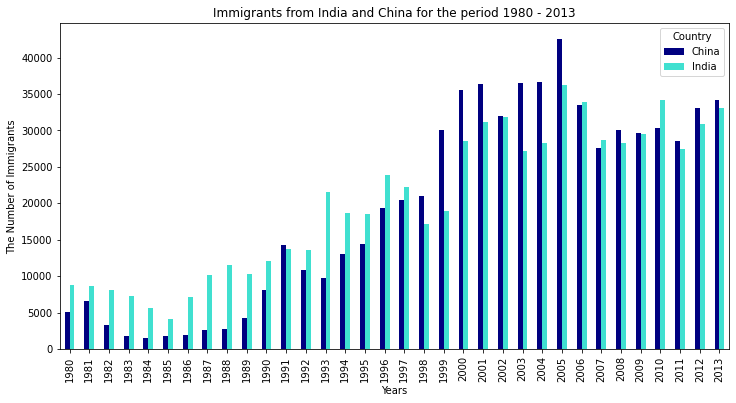

In [91]:
# Rahma Fadhila Moenggah (1301180050) 
### type your answer here
df_CI.plot(kind='bar', figsize=(12, 6), color=['navy', 'turquoise'])

plt.title('Immigrants from India and China for the period 1980 - 2013')
plt.xlabel('Years')
plt.ylabel('The Number of Immigrants')

plt.show()

**Question 3:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.

In [92]:
# Rahma Fadhila Moenggah (1301180050) 
### type your answer here
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:
   1. Create a list of all years in decades 80's, 90's, and 00's.
   2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
   3. Merge the three series into a new data frame. Call your dataframe **new_df**.

In [93]:
### type your answer here
# Create a list of all years in decades 80's, 90's, and 00's
list_80 = list(map(str, range(1980, 1990))) 
list_90 = list(map(str, range(1990, 2000))) 
list_00 = list(map(str, range(2000, 2010)))

# Slice the original dataframe
df_80 = df_top15.loc[:, list_80].sum(axis=1) 
df_90 = df_top15.loc[:, list_90].sum(axis=1) 
df_00 = df_top15.loc[:, list_00].sum(axis=1)

# Merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80, '1990s': df_90, '2000s': df_00}) 
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


Step 3: Plot the box plots.

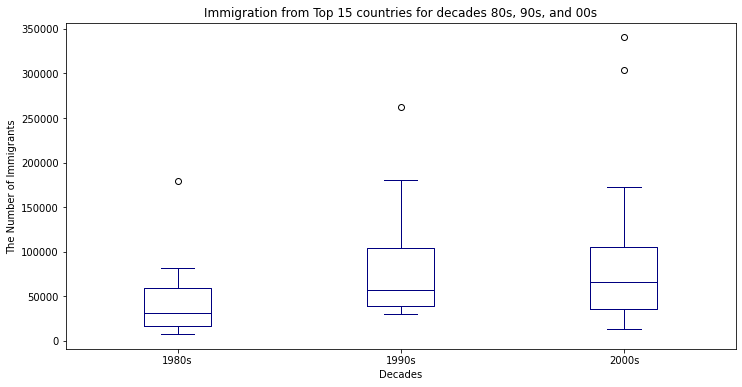

In [94]:
# Rahma Fadhila Moenggah (1301180050) 
### type your answer here
new_df.plot(kind='box', figsize=(12, 6), color='navy')
plt.title('Immigration from Top 15 countries for decades 80s, 90s, and 00s')
plt.xlabel('Decades')
plt.ylabel('The Number of Immigrants')
plt.show()

**Question 4**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [95]:
### type your answer here
# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()

# Sum the immigration numbers across all three countries
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Reset the index in place
df_total.reset_index(inplace=True)

# Rename the columns to year and total
df_total.columns = ['year', 'total']

# Convert type data to int
df_total['year'] = df_total['year'].astype(int)

# Display the resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

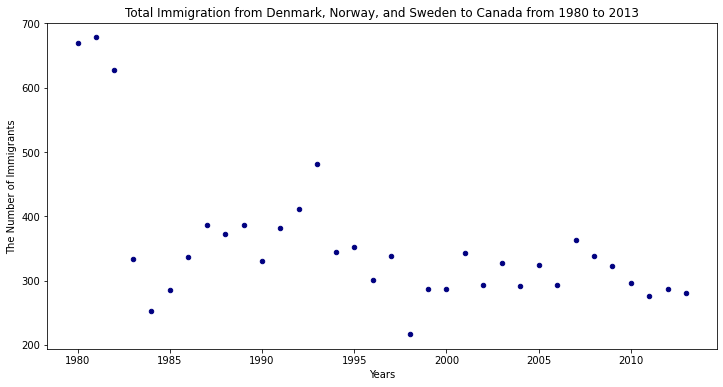

In [96]:
### type your answer here
df_total.plot(kind='scatter', figsize=(12, 6), x='year', y='total', color='navy')

plt.title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('The Number of Immigrants')

# Display plot
plt.show()

**Question 5**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [97]:
# Rahma Fadhila Moenggah (1301180050) 
### type your answer here
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

# Normalize data China
normalize_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# Normalize data India
normalize_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


Step 2: Generate the bubble plots.

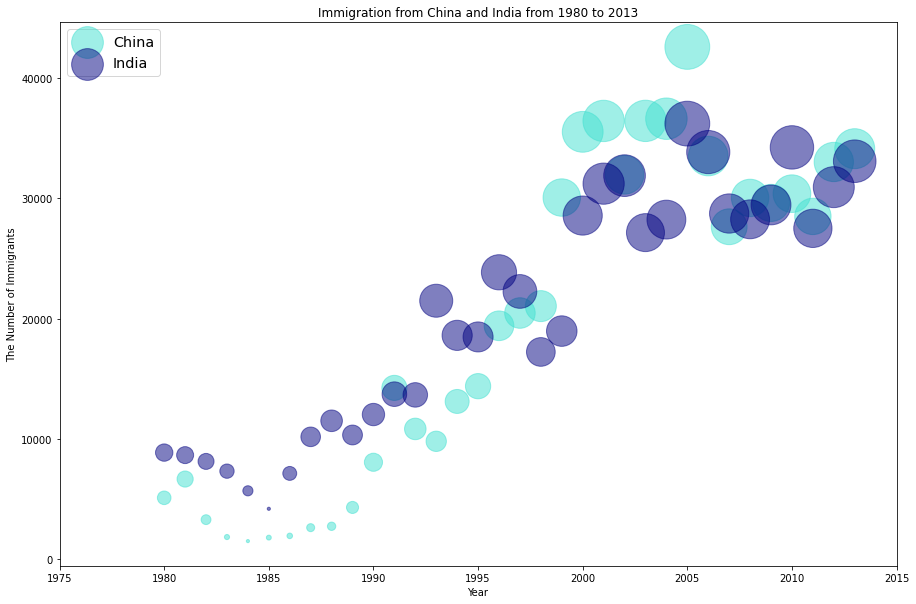

In [99]:
### type your answer here
# China
ax_china = df_can_t.plot(kind='scatter', x='Year', y='China', color='turquoise', figsize=(15, 10), alpha=0.5, xlim=(1975, 2015), s=normalize_china * 2000 + 10)

# India
ax_india = df_can_t.plot(kind='scatter', x='Year', y='India', color="navy", alpha=0.5, ax = ax_china, s=normalize_india * 2000 + 10)

ax_china.set_title('Immigration from China and India from 1980 to 2013')
ax_china.set_ylabel('The Number of Immigrants')
ax_china.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).